# Home Credit EDA

## Author : Neil Samuel Pulukuri
## unid : u1448225

## Table of Contents

1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Data-Description">Data Description</a>
3. <a href="#3.-Exploring-the-Target-variable">Exploring the Target variable</a>
4. <a href="#4.-Dealing-with-Missing-Values">Dealing with Missing Values</a>
5. <a href="#5.-Dealing-with-Multi-Collinearity">Dealing with Multi Collinearity</a>
6. <a href="#6.-Imputing-Data">Imputing Data</a>
7. <a href="#7.-EDA">EDA</a>
8. <a href="#8.-Converting-Categorical-to-Numerical-variables">Converting Categorical to Numerical variables</a>
9. <a href="#9.-Joining-Dataset-Bureau">Joining Dataset Bureau</a>
10. <a href="#10.-Result">Result</a>
11. <a href="#11.-Next-Steps">Next Steps</a>



## 1. Introduction

Home Credit aims to expand its financial services by offering loans to individuals without established credit histories, thus safeguarding them from unscrupulous lenders. To achieve this, Home Credit utilizes telco and transactional data to assess their clients' repayment capabilities. While Home Credit is using various statistical methods to make their prediction they believe that more accurate information can be fetched from the data.To attain greater accuracy and unlock the full potential of their model, the initial step involves conducting exploratory data analysis (EDA). EDA allows for valuable insights to be drawn from the data, enabling the identification and removal of unnecessary information. This process sets the stage for the application of a machine learning model, which will aid Home Credit in reducing loan defaults through accurate predictions. Insights obtained from EDA include factors influencing loan default, providing essential information for improving lending decisions.

## 2. Data Description

The dataset provided for the project is a real world dataset provided by home credit. It contains application train and application test data. Along with the train and test data there are also other datasets that supplements the train dataset which helps in building a machine learning model which will accurately predict the loan default.

In [88]:
# importing the libraries required for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### Application Train/Test dataset

In [89]:
# Path
train_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\application_train.csv"
test_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\application_test.csv"

In [90]:
# Reading Application train/Test
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [91]:
# Printing the 5 rows of Application train dataset
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [92]:
# Printing the dimensions of Application train dataset
train_data.shape

(307511, 122)

In [93]:
# Getting statistical desciption since this is the dataset we will be using for prediction
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [94]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

#### The application train dataset is the primary dataset we will use to build the machine learning model. This dataset contains all the essential information about the clients' loan repayment capability.

### Bureau dataset

In [95]:
# path
bureau_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\bureau.csv"

In [96]:
# Reading the bureau dataset
bureau_data = pd.read_csv(bureau_path)

In [97]:
# Printing the first 5 rows of bureau dataset
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [98]:
# Printing the dimensions of the bureau dataset
bureau_data.shape

(1716428, 17)

#### This data set contains all client's previous credits provided by other financial institutions that were reported to Credit Bureau

### Bureau Balance dataset

In [99]:
# path
bureau_balance_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\bureau_balance.csv"

In [100]:
# reading the bureau_balance_dataset
bureau_balance_data = pd.read_csv(bureau_balance_path)

In [101]:
# printing the bureau_balance_dataset
bureau_balance_data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [102]:
# printing the dimensions of bureau_balance_dataset 
bureau_balance_data.shape

(27299925, 3)

#### Monthly balances of previous credits in Credit Bureau is mentioned in the datset

### POS Cash Balance dataset

In [103]:
# path
pos_cash_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\POS_CASH_balance.csv"

In [104]:
# reading the POS Cash Balance dataset
pos_cash_data = pd.read_csv(pos_cash_path)

In [105]:
# printing the first five rows of the POS Cash balance dataset
pos_cash_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [106]:
# printing the dimensions of the pos cash balance dataset
pos_cash_data.shape

(10001358, 8)

#### Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit is mentioned in the dataset

### Credit Card Balance

In [107]:
# path
credit_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\credit_card_balance.csv"

In [108]:
# reading the credit_card_balance dataset
credit_data = pd.read_csv(credit_path)

In [109]:
# printing the credit card balance dataset
credit_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


#### Monthly balance snapshots of previous credit cards that the applicant has with Home Credit is mentioned in the dataset.

### Previous Application dataset

In [110]:
# path
previous_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\previous_application.csv"

In [111]:
# reading the previous application dataset
previous_data = pd.read_csv(previous_path)

In [112]:
# printing the previous application dataset
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
previous_data.shape

(1670214, 37)

#### All previous applications for Home Credit loans of clients who have loans in our sample are mentioned in this dataset.

### Installment Payment dataset

In [114]:
# path
installment_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\installments_payments.csv"

In [115]:
# reading the installement payment dataset
installment_data = pd.read_csv(installment_path)

In [116]:
# printing the first five rows of installment payment dataset
installment_data.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [117]:
# printing the shape of installement payment dataset
installment_data.shape

(13605401, 8)

#### This data set contains repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

## 3. Exploring the Target variable

In [118]:
# Counting the unique values of target variable
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

[Text(0.5, 1.0, 'Distribution of the Target Variable')]

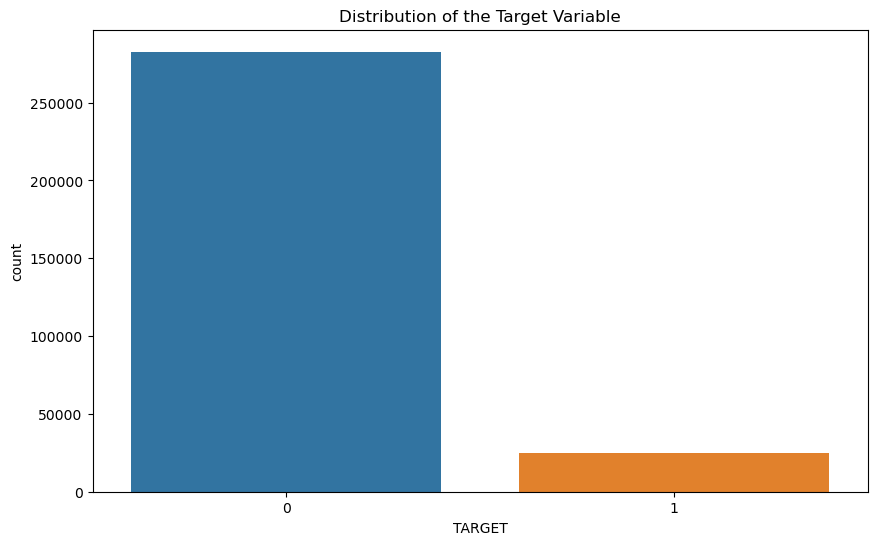

In [119]:
# Plotting the above desciption
plt.figure(figsize=(10, 6))
sns.countplot(x = train_data['TARGET'], data = train_data).set(title='Distribution of the Target Variable')

####  The data is imbalanced with respect to the target variable. Most of the loans are repaid

In [120]:
# Calculate the accuracy for a majority class classifier using mean
accuracy_majority_class = (train_data['TARGET'] == 0).mean()

# Print the results
print(f"Accuracy for Majority Class: {accuracy_majority_class:.2f}")

Accuracy for Majority Class: 0.92


## 4. Dealing with Missing Values

In [121]:
# Function to calculate the missing data which gives percentage
def missing_data(data):
    missing_percentage = data.isna().mean()*100
    return pd.DataFrame(data = {'col_name' : data.columns.values, 'missing_percentage' : missing_percentage})

In [122]:
# Top 20 missing values
missing_data_result = missing_data(train_data)
top_missing = missing_data_result.sort_values(by='missing_percentage', ascending=False).reset_index(drop=True).head(20)
top_missing

,col_name,missing_percentage
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MODE,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MEDI,68.354953


In [123]:
# Calculating correlation before removing columns which have more than 40 % percentage missing values
correlations = train_data.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(5))
print('Most Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlations:
 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


#### Removing Columns with more than 40% missing values ,but EXT_SOURCE_1 has higher correlation with target so not removing EXT_SOURCE_1 

In [124]:
missing_columns_40 = missing_data(train_data)

In [125]:
# Finding columns which has more than 40 % missing value percentage except EXT_SOURCE_1 which has a strong negative correlation
if 'EXT_SOURCE_1' in missing_columns_40['col_name'].values:
    missing_columns_40_list = missing_columns_40['col_name'][missing_columns_40['col_name'] != 'EXT_SOURCE_1'][missing_columns_40['missing_percentage'] > 40]
else:
    missing_columns_40_list = missing_columns_40['col_name'][missing_columns_40['missing_percentage'] > 40]

In [126]:
# Total columns with more than 40 % missing values
print(f"No of columns with greater than 40% missing values: {len(missing_columns_40_list)}")

No of columns with greater than 40% missing values: 48


In [127]:
# Droping those 41 columns
train_data.drop(missing_columns_40_list,axis = 1, inplace = True)

In [128]:
# checking the train_data dimensions
train_data.shape

(307511, 74)

In [129]:
# Flag document just flags the data whether customer submitted document or not so better to remove 

flag_documents = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [130]:
# removing those flag columns
train_data.drop(columns=flag_documents, inplace=True)

In [131]:
# checking the train_data dimensions
train_data.shape

(307511, 54)

## 5. Dealing with Multi Collinearity

In [132]:
# Calculating correlation between numerical variables
correlation_matrix = train_data.corr()
highly_correlated = set()

# Find variables with correlation > 0.7
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)
highly_correlated

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY'}

In [133]:
# Before we remove those columns with multi collinearity lets calculate those columns correlation with target variables
correlation_columns = ['AMT_ANNUITY',
                       'AMT_GOODS_PRICE',
                       'CNT_FAM_MEMBERS',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'FLAG_EMP_PHONE',
                       'LIVE_CITY_NOT_WORK_CITY',
                       'LIVE_REGION_NOT_WORK_REGION',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                       'REGION_RATING_CLIENT_W_CITY']

correlations_1 = train_data[correlation_columns + ['TARGET']].corr()['TARGET']
correlations_1

AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
CNT_FAM_MEMBERS                0.009308
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_EMP_PHONE                 0.045982
LIVE_CITY_NOT_WORK_CITY        0.032518
LIVE_REGION_NOT_WORK_REGION    0.002819
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

In [134]:
# Finding columns with correlation less than 0.04
remove_columns_less_corr = correlations_1[correlations_1 < 0.04].index

In [135]:
# Drop those columns
train_data.drop(columns=remove_columns_less_corr, inplace=True)

In [136]:
# Calculating the train data shape
train_data.shape

(307511, 47)

## 6. Imputing Data

In [137]:
# Distribution of data types in training data
train_data.dtypes.value_counts()

int64      19
float64    16
object     12
dtype: int64

In [138]:
# Finding out object datatype
train_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [139]:
# Fill missing values in 'object_columns' with the first mode value
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)

In [140]:
# Just checking whether all the object datatype columns have no null values
train_data.select_dtypes('object').isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [141]:
# Fill missing values in 'float_columns' with their median values
for column in train_data.columns:
    if train_data[column].dtype == 'float':
        train_data[column].fillna(train_data[column].median(), inplace=True)

In [142]:
# Verifying whether dataset has no null values
train_data.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [143]:
# Using the function to cross check whether data is cleaned or not
missing_data(train_data).sort_values(by='missing_percentage', ascending=False).reset_index(drop=True).head(5)

,col_name,missing_percentage
0,SK_ID_CURR,0.0
1,EXT_SOURCE_1,0.0
2,REGION_RATING_CLIENT,0.0
3,REGION_RATING_CLIENT_W_CITY,0.0
4,WEEKDAY_APPR_PROCESS_START,0.0


In [144]:
train_data.dtypes.value_counts()

int64      19
float64    16
object     12
dtype: int64

In [145]:
pd.set_option('display.max_columns', None)
train_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307511,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,249818,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151577,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.078173,0.230454,NaN,0.504311,5.145034e-01,0.515695,1.417523,0.142944,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,NaN,NaN,NaN,NaN,NaN,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,NaN,0.509034,0.502737,NaN,3.265832,0.122126,0.219526,0.268444,0.421124,NaN,0.139408,1.908699e-01,0.174736,2.398395,0.446033,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,NaN,NaN,NaN,NaN,NaN,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.014568,8.173617e-08,0.000527,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,NaN,NaN,NaN,NaN,NaN,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,2.000000,NaN,10.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.505998,3.929737e-01,0.417100,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,NaN,NaN,NaN,NaN,NaN,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,2.000000,NaN,12.

## 7. EDA

### Which Loans are more common

[Text(0.5, 1.0, 'Distribution of the Loans')]

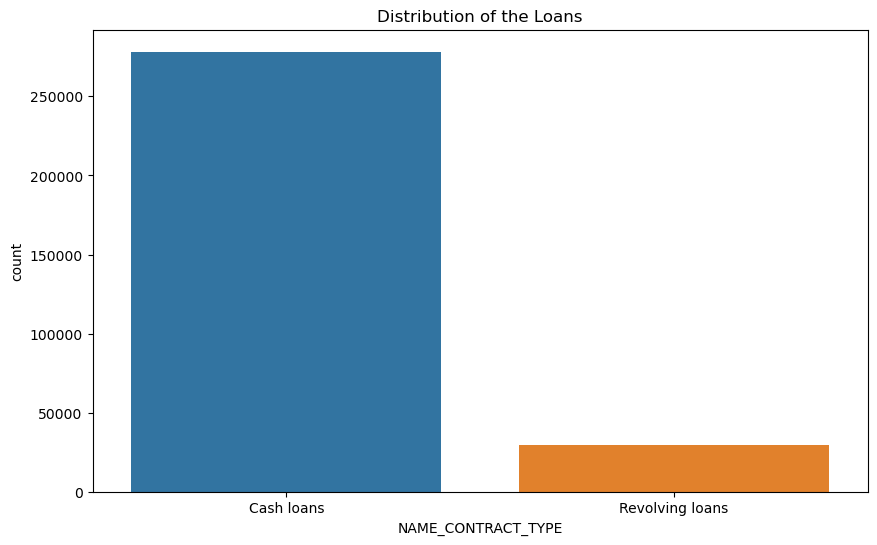

In [146]:
# Count Plot to find the distribution of various loans
plt.figure(figsize=(10, 6))
sns.countplot(x = train_data['NAME_CONTRACT_TYPE'], data = train_data).set(title='Distribution of the Loans')

#### From the above countplot it can be noted that CashLoans are dominant to revolving loans

### Which Gender has more clients

[Text(0.5, 1.0, 'Distribution of Gender')]

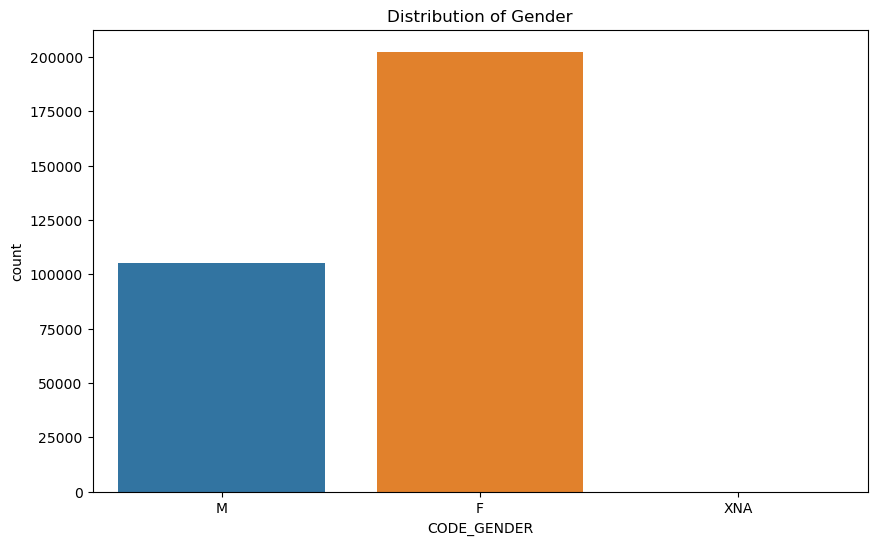

In [147]:
# Plotting a countplot for knowing the count of gender
plt.figure(figsize=(10, 6))
sns.countplot(x='CODE_GENDER',data=train_data).set(title='Distribution of Gender')

#### We have more female population who are clients

### Which Gender are more likely to default

[Text(0.5, 1.0, 'Distribution of Gender')]

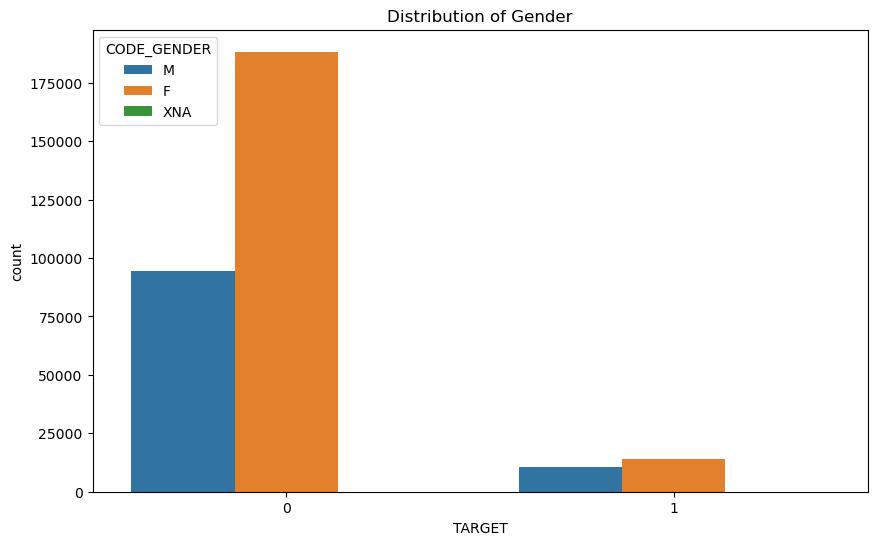

In [148]:
# Using a countplot with hue to determine which gender is most likely to default
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET',hue ='CODE_GENDER', data=train_data).set(title='Distribution of Gender')

#### Females are more likely to default.

### Top 5 Occupation types as clients

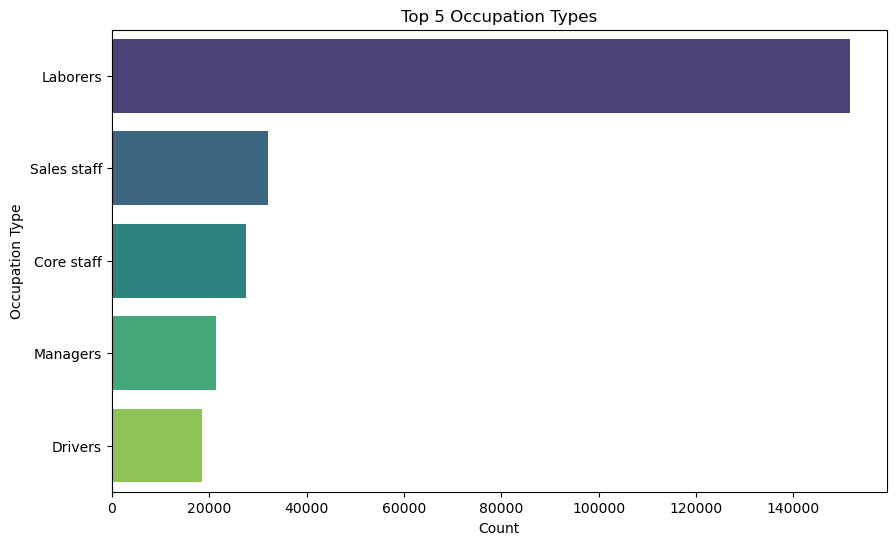

In [149]:
# A bar plot to find out top 5 occupation of clients
top_occupations = train_data['OCCUPATION_TYPE'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_occupations.values, y=top_occupations.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Occupation Type")
plt.title("Top 5 Occupation Types")
plt.show()

#### Most of the client who take loans are Laborers

### Occupation Type Annual Income distribution

Text(0, 0.5, 'Average Annual family income')

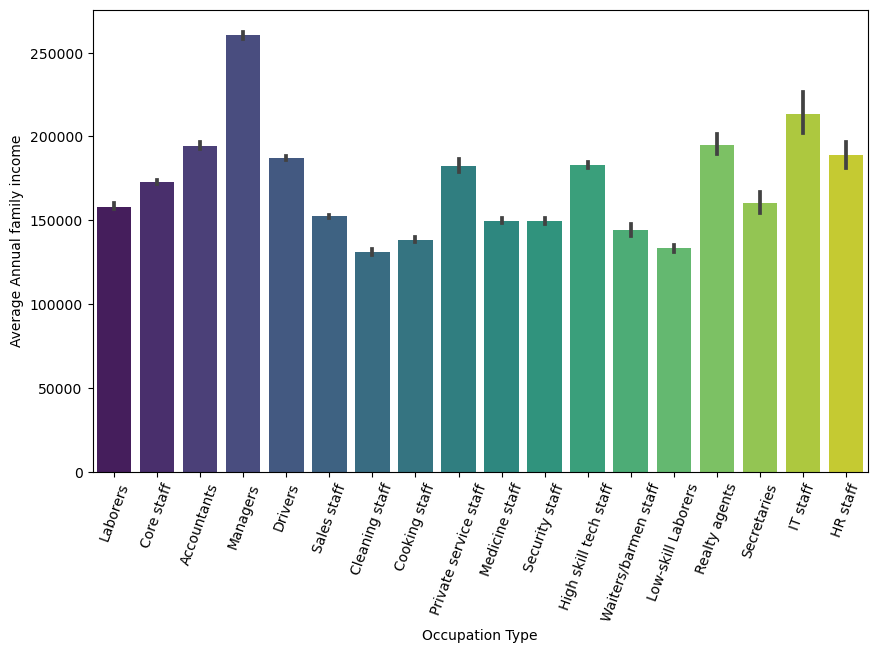

In [150]:
# A bar plot for determining the net annual income per organization type
plt.figure(figsize=(10, 6))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',palette="viridis",data=train_data)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

#### Borrowers who are managers tend to have the highest annual family income, whereas those employed as cleaning staff typically have the lowest annual family income.

### Does Occupation types effect loan default

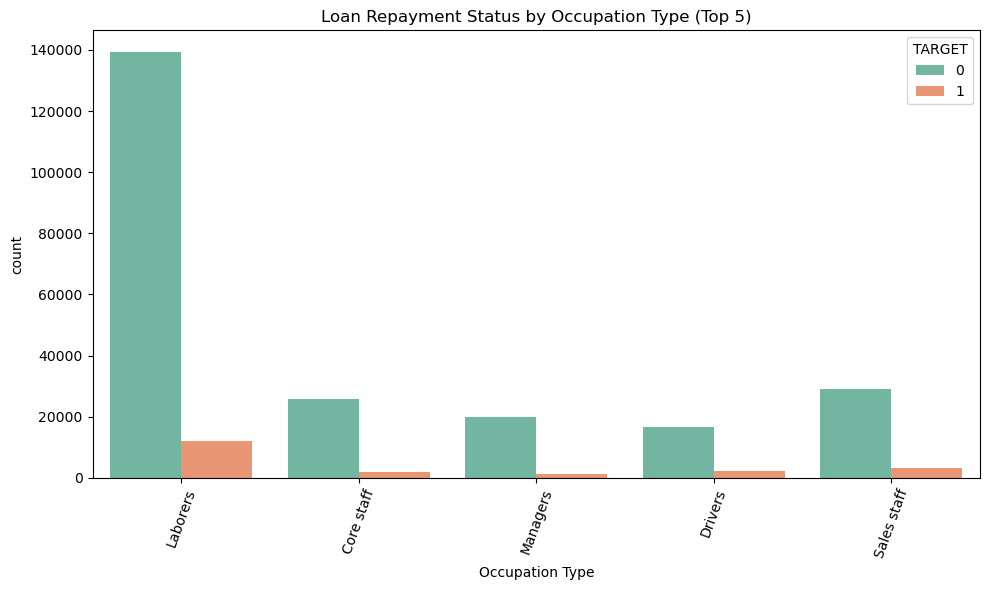

In [151]:
# Calculate the top 5 occupations by count
top_occupations = train_data['OCCUPATION_TYPE'].value_counts().head(5)

# Filter train_data to include only the top 5 occupations
filtered_data = train_data[train_data['OCCUPATION_TYPE'].isin(top_occupations.index)]

# Create the figure for the second plot only
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=filtered_data, palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.title("Loan Repayment Status by Occupation Type (Top 5)")
plt.tight_layout()
plt.show()

# Showing only top5 to avoid cluttering of plot

#### Although laborers are the most clients they also are more likely to default.

### Having Children does it effect the loan default for the top Organization types

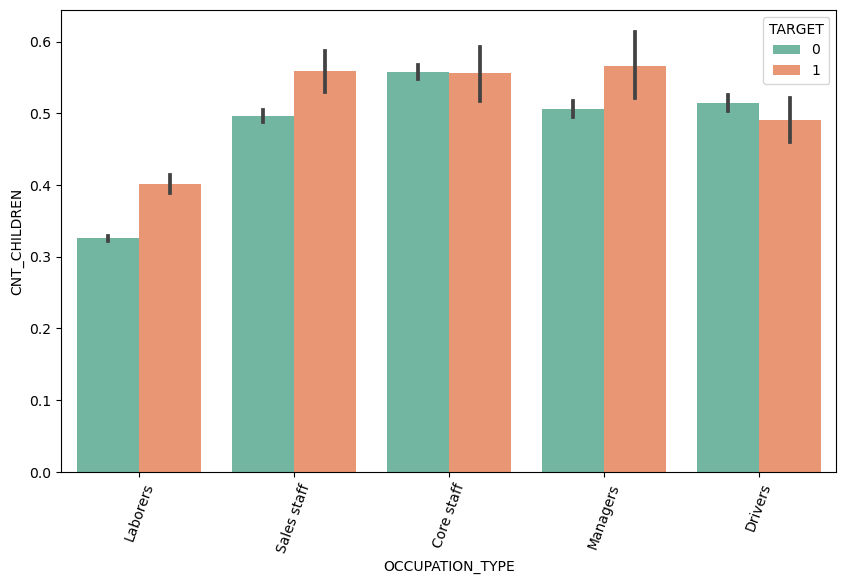

In [152]:
# Calculate the top 5 occupations with the highest average number of children in descending order
top_occupations = train_data.groupby('OCCUPATION_TYPE')['CNT_CHILDREN'].sum().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 occupations
filtered_data = train_data[train_data['OCCUPATION_TYPE'].isin(top_occupations)]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='OCCUPATION_TYPE', y='CNT_CHILDREN', hue='TARGET', palette="Set2",data=filtered_data, order=top_occupations)
plt.xticks(rotation=70)
plt.show()

#### Private service staff tend to have a higher number of children, which potentially contributes to their increased challenges in loan repayment.

In [153]:
# Finding out correlations
correlations = train_data.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('Most Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 DAYS_REGISTRATION              0.041975
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlations:
 EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_1                 -0.098887
DAYS_EMPLOYED                -0.044932
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE                   -0.023806
AMT_REQ_CREDIT_BUREAU_MON    -0.014794
AMT_REQ_CREDIT_BUREAU_QRT    -0.005833
Name: TARGET, dtype: float64


### Which Age is more likely to default (from correlation)

In [154]:
train_data['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [155]:
# Converting to days and multiplying by -1 to get rid of negative values and then finally rounding off
train_data['DAYS_BIRTH'] = (train_data['DAYS_BIRTH'] / (-365)).astype(int)

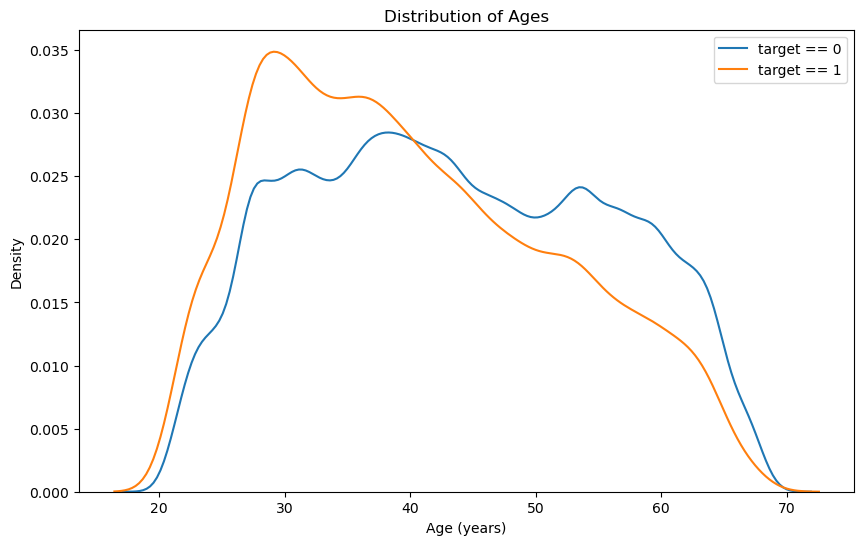

In [156]:
#Plotting a kde plot to know the distribution of Ages with respect to target
plt.figure(figsize = (10, 6))
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH'], label = 'target == 0')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH'], label = 'target == 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend()

####  The graph suggests that individuals in their 30s have a higher likelihood of loan repayment difficulties (target=1), with a decreasing trend as age increases.

### The impact of EXT_SOURCE 2 which has a high correlation with respect to  target

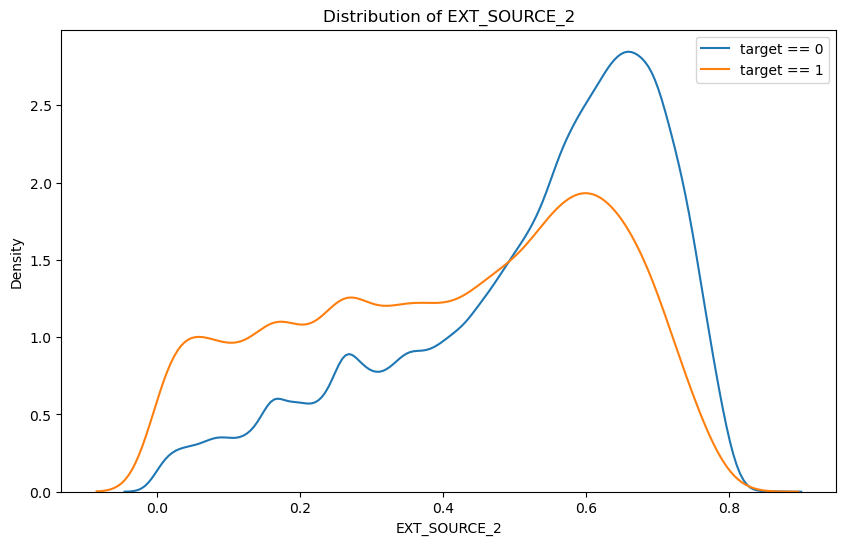

In [157]:
# Plotting a KDE plot to know the distribution of EXT_SOURCE_2 with respect to target
plt.figure(figsize = (10, 6))
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')
plt.xlabel('EXT_SOURCE_2'); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_2');
plt.legend()

#### Higher the EXT_SOURCE_2 more likely to default

## 8. Converting Categorical to Numerical variables

In [158]:
### Dealing with Categorical variables
list(train_data.select_dtypes('object'))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [159]:
# Apply One Hot Encoding to convert object type to numerical type
train_data = pd.get_dummies(train_data)

In [160]:
# verifying whether the object variables are converted to numerical
list(train_data.select_dtypes('object'))

[]

## 9. Joining Dataset Bureau

In [161]:
# Printing the first 5 rows
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [162]:
# Dimensions of Bureau dataset
bureau_data.shape

(1716428, 17)

In [163]:
# Columns of Bureau dataset
bureau_data.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [179]:
bureau_data.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [164]:
# Calculate the missing percentage
missing_data(bureau_data)

,col_name,missing_percentage
SK_ID_CURR,SK_ID_CURR,0.000000
SK_ID_BUREAU,SK_ID_BUREAU,0.000000
CREDIT_ACTIVE,CREDIT_ACTIVE,0.000000
CREDIT_CURRENCY,CREDIT_CURRENCY,0.000000
DAYS_CREDIT,DAYS_CREDIT,0.000000
CREDIT_DAY_OVERDUE,CREDIT_DAY_OVERDUE,0.000000
DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE,6.149573
DAYS_ENDDATE_FACT,DAYS_ENDDATE_FACT,36.916958
AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_MAX_OVERDUE,65.513264
CNT_CREDIT_PROLONG,CNT_CREDIT_PROLONG,0.000000


In [166]:
# Combining the two datasets aggregating two match the train_dataset
train_data_bureau_combine = train_data.merge(bureau_data.groupby('SK_ID_CURR').mean().reset_index(), 
                                            left_on='SK_ID_CURR', right_on='SK_ID_CURR', 
                                            how='left', validate='one_to_one')

In [169]:
# original train dataset
train_data.shape

(307511, 159)

In [170]:
# Dimensions of the Combine dataset
train_data_bureau_combine.shape

(307511, 172)

In [173]:
# Printing the Combine Dataset
train_data_bureau_combine.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Ser

In [189]:
# Calculating correlation with respect to target
correlations_combined = train_data_bureau_combine[['SK_ID_CURR', 'SK_ID_BUREAU',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY','TARGET']].corr()['TARGET'].sort_values()


In [190]:
correlations_combined

AMT_CREDIT_SUM           -0.019957
SK_ID_BUREAU             -0.011792
AMT_CREDIT_SUM_LIMIT     -0.011446
SK_ID_CURR               -0.002108
AMT_ANNUITY              -0.001391
AMT_CREDIT_SUM_DEBT      -0.000637
AMT_CREDIT_MAX_OVERDUE    0.002435
CNT_CREDIT_PROLONG        0.003031
AMT_CREDIT_SUM_OVERDUE    0.007150
CREDIT_DAY_OVERDUE        0.008118
DAYS_CREDIT_ENDDATE       0.046983
DAYS_ENDDATE_FACT         0.053200
DAYS_CREDIT_UPDATE        0.068927
DAYS_CREDIT               0.089729
TARGET                    1.000000
Name: TARGET, dtype: float64

#### Days Credit column of Bureau dataset has the highest correlation with respect to target

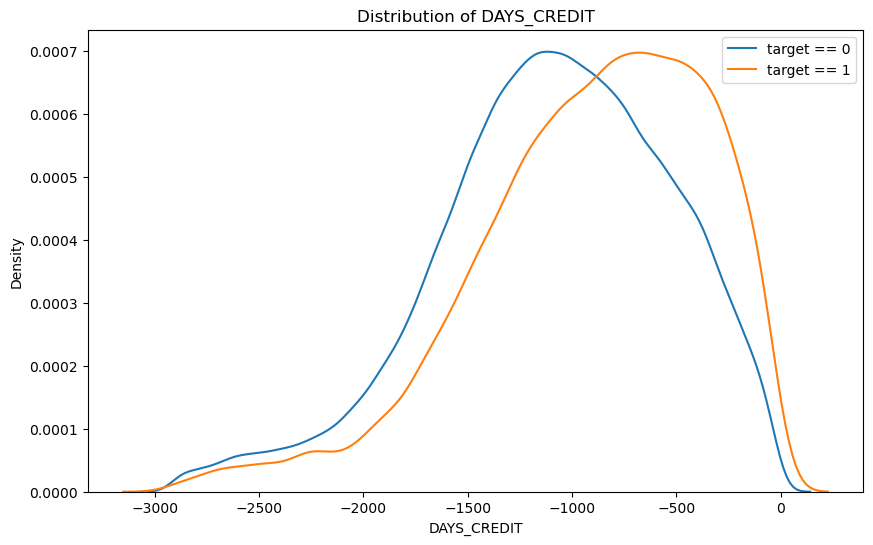

In [191]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_data_bureau_combine.loc[train_data_bureau_combine['TARGET'] == 0, 'DAYS_CREDIT'], label='target == 0')
sns.kdeplot(train_data_bureau_combine.loc[train_data_bureau_combine['TARGET'] == 1, 'DAYS_CREDIT'], label='target == 1')
plt.xlabel('DAYS_CREDIT')
plt.ylabel('Density')
plt.title('Distribution of DAYS_CREDIT')
plt.legend()
plt.show()

#### The more days days before current application did client apply for Credit Bureau credit before the less is the default

## 10. Result

**1. The data is imbalanced with respect to the target variable. Most of the loans are repaid**

**2. CashLoans are dominant to revolving loans**

**3. We have more female population who are clients**

**4. Females are more likely to default**

**5. Most of the client who take loans are Laborers**

**6. Borrowers who are managers tend to have the highest annual family income, compared to cleaning staff who have less income**

**7. Although laborers are the most clients they also are more likely to default**

**8. Having Children increases the chance of default as observed in the case of private staff**

**9. Younger the age more probability of default**

**10. Higher the external source 2 value more is the dafault**

## 11. Next Steps

**1. We can standardize the data**

**2. Then we can split the data**

**3. Apply a Random Forest Model**

**4. Calculate the accuracy**